In [ ]:
!nvidia-smi

Sat Jul 13 08:15:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
!unzip ./car-20240712T071720Z-001.zip -d.

Archive:  ./car-20240712T071720Z-001.zip
  inflating: ./car/test/images/no_damage_57_jpg.rf.ec7d0a849593e84ceac8584cad90441a.jpg  
  inflating: ./car/test/images/Cars37_png.rf.126193ac25a64b7af99f6ba2df6a57de.jpg  
  inflating: ./car/README.roboflow.txt  
  inflating: ./car/test/images/Cars53_png.rf.0edd90a3213d88f02aba9ba00ce5e472.jpg  
  inflating: ./car/test/images/Cars345_png.rf.65aa706923f2c7b86fde386d8848686a.jpg  
  inflating: ./car/test/labels/no_damage_61_jpg.rf.da3fb178d525d122b51abdbc9d072f99.txt  
  inflating: ./car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg  
  inflating: ./car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg  
  inflating: ./car/valid/labels.cache  
  inflating: ./car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg  
  inflating: ./car/test/images/Cars411_png.rf.7b08e44315268c4a52fec6cb2901269b.jpg  
  inflating: ./car/test/images/Cars429_png.rf.14251e3d597705374666a2f403a1172e.jpg  
  inflating: ./car/t

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
#%cd ./car
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=20 imgsz=640 plots=True

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

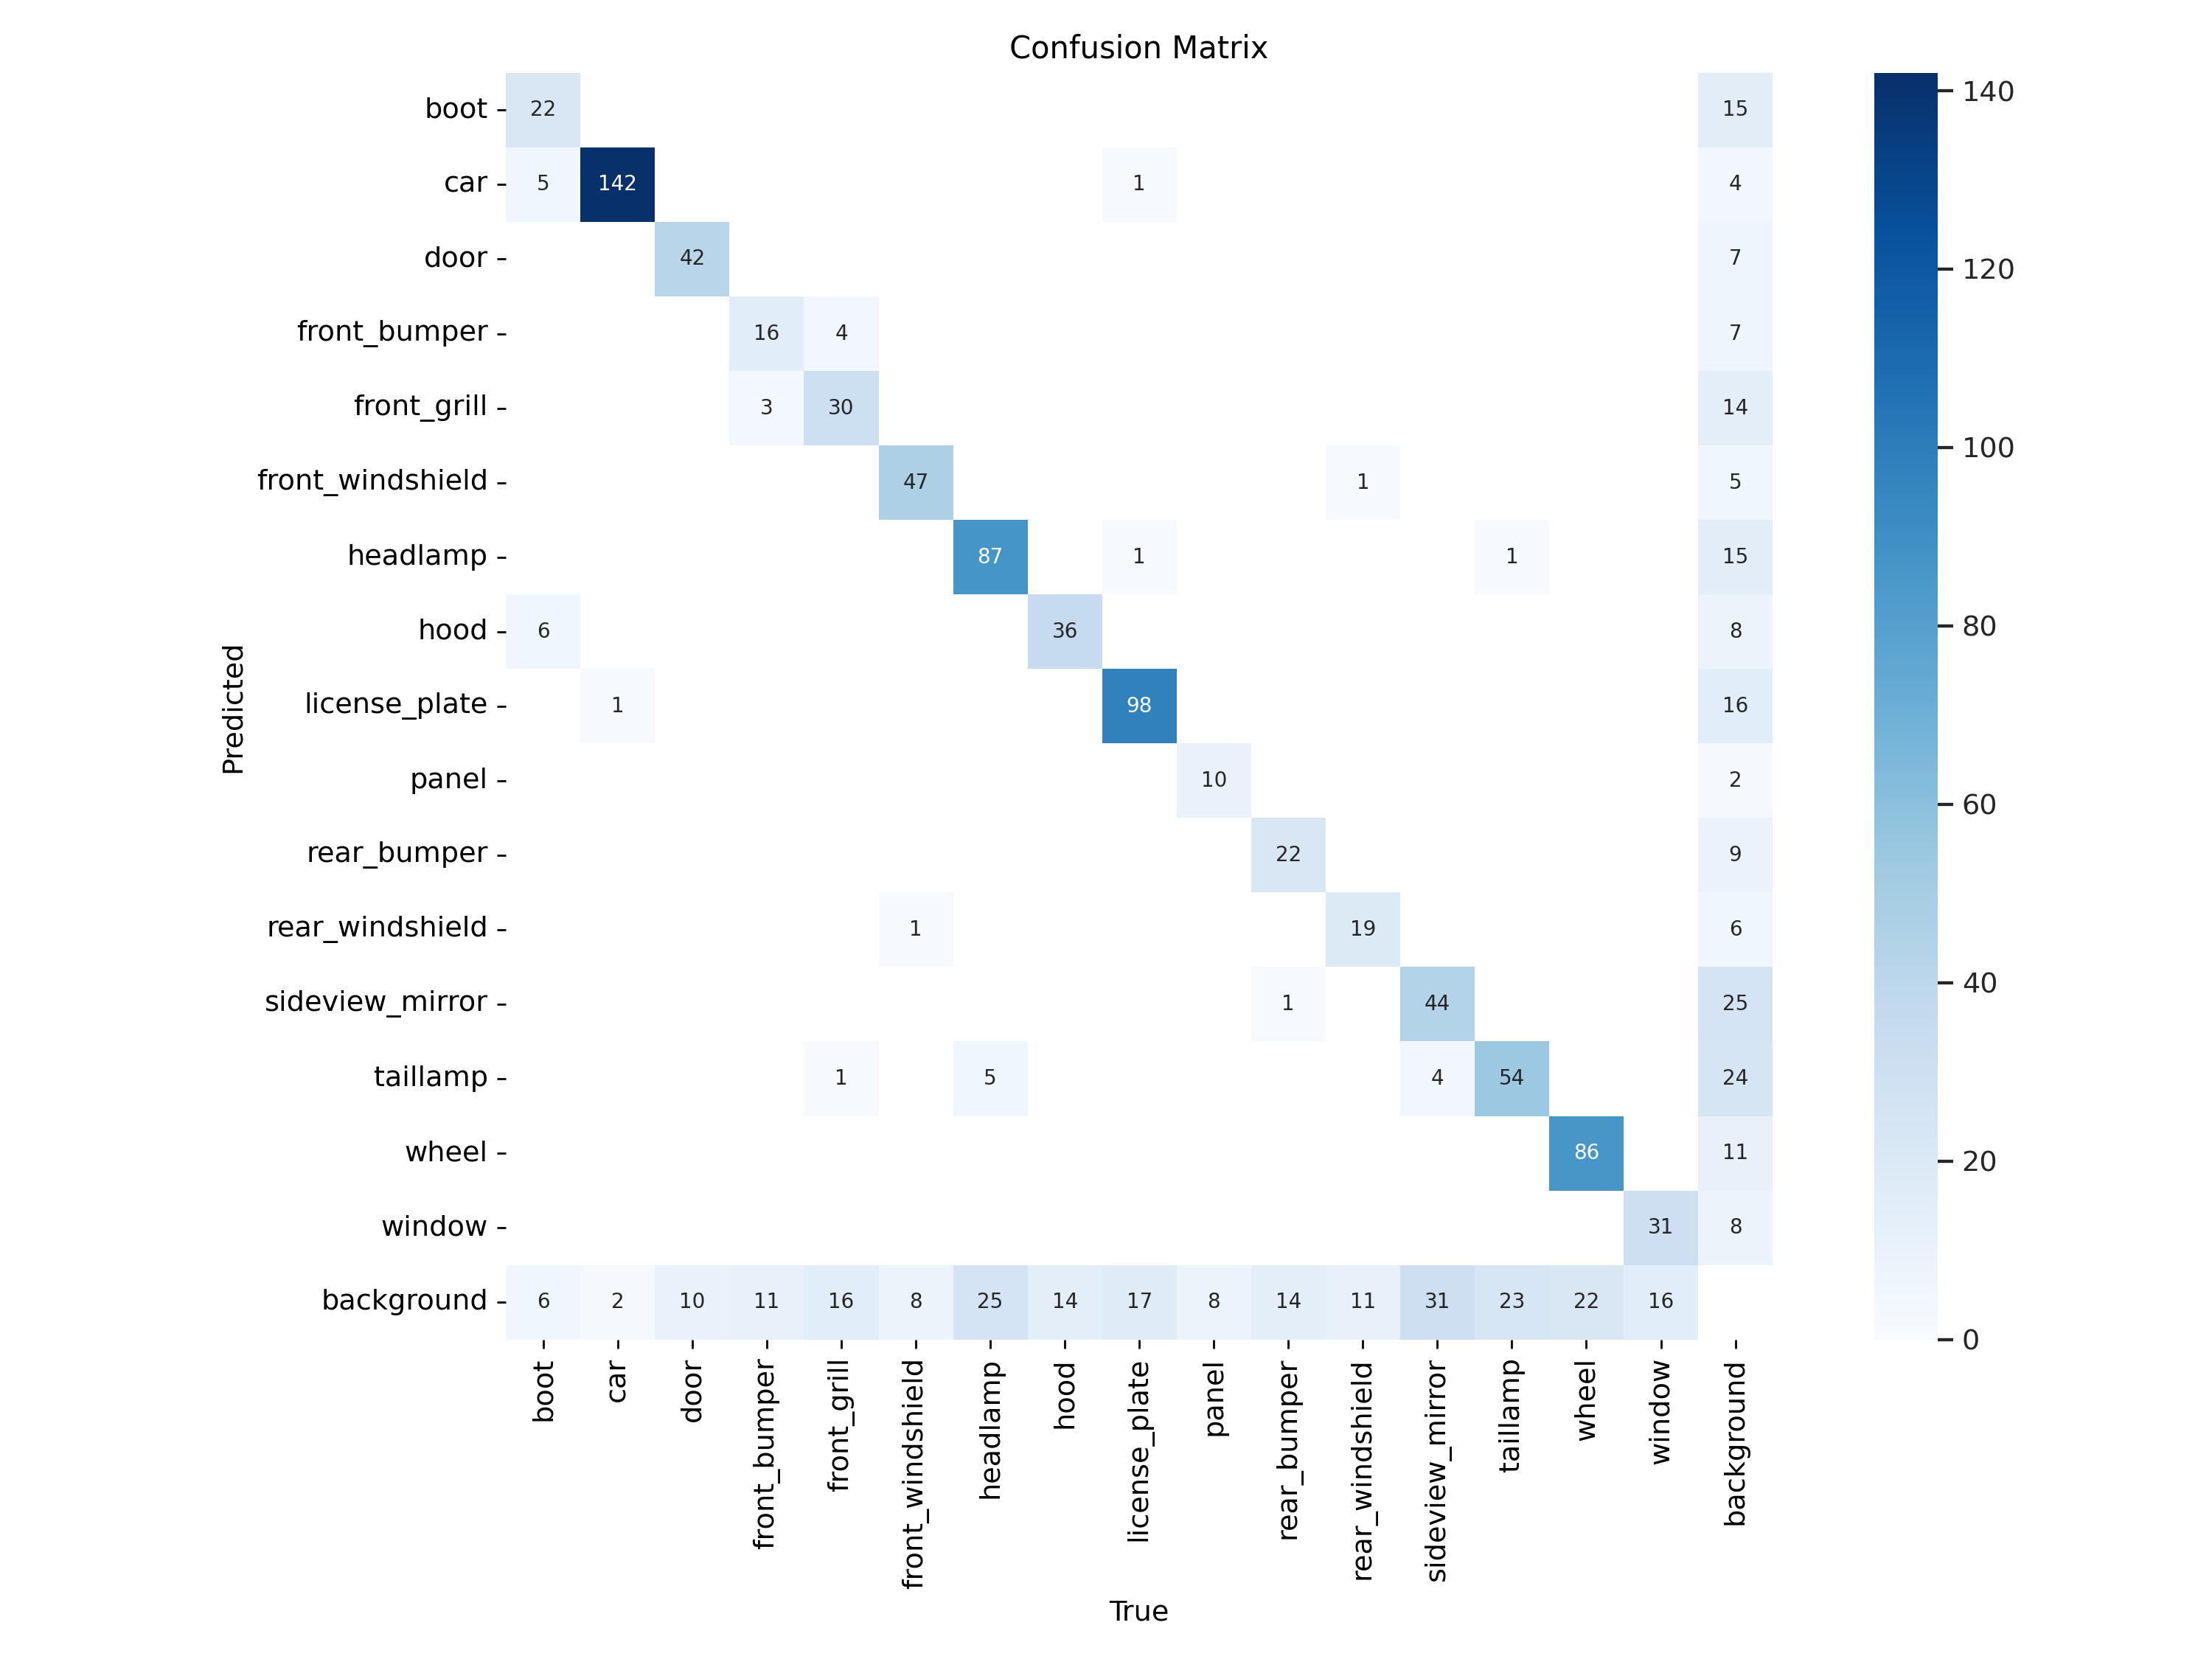

In [8]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

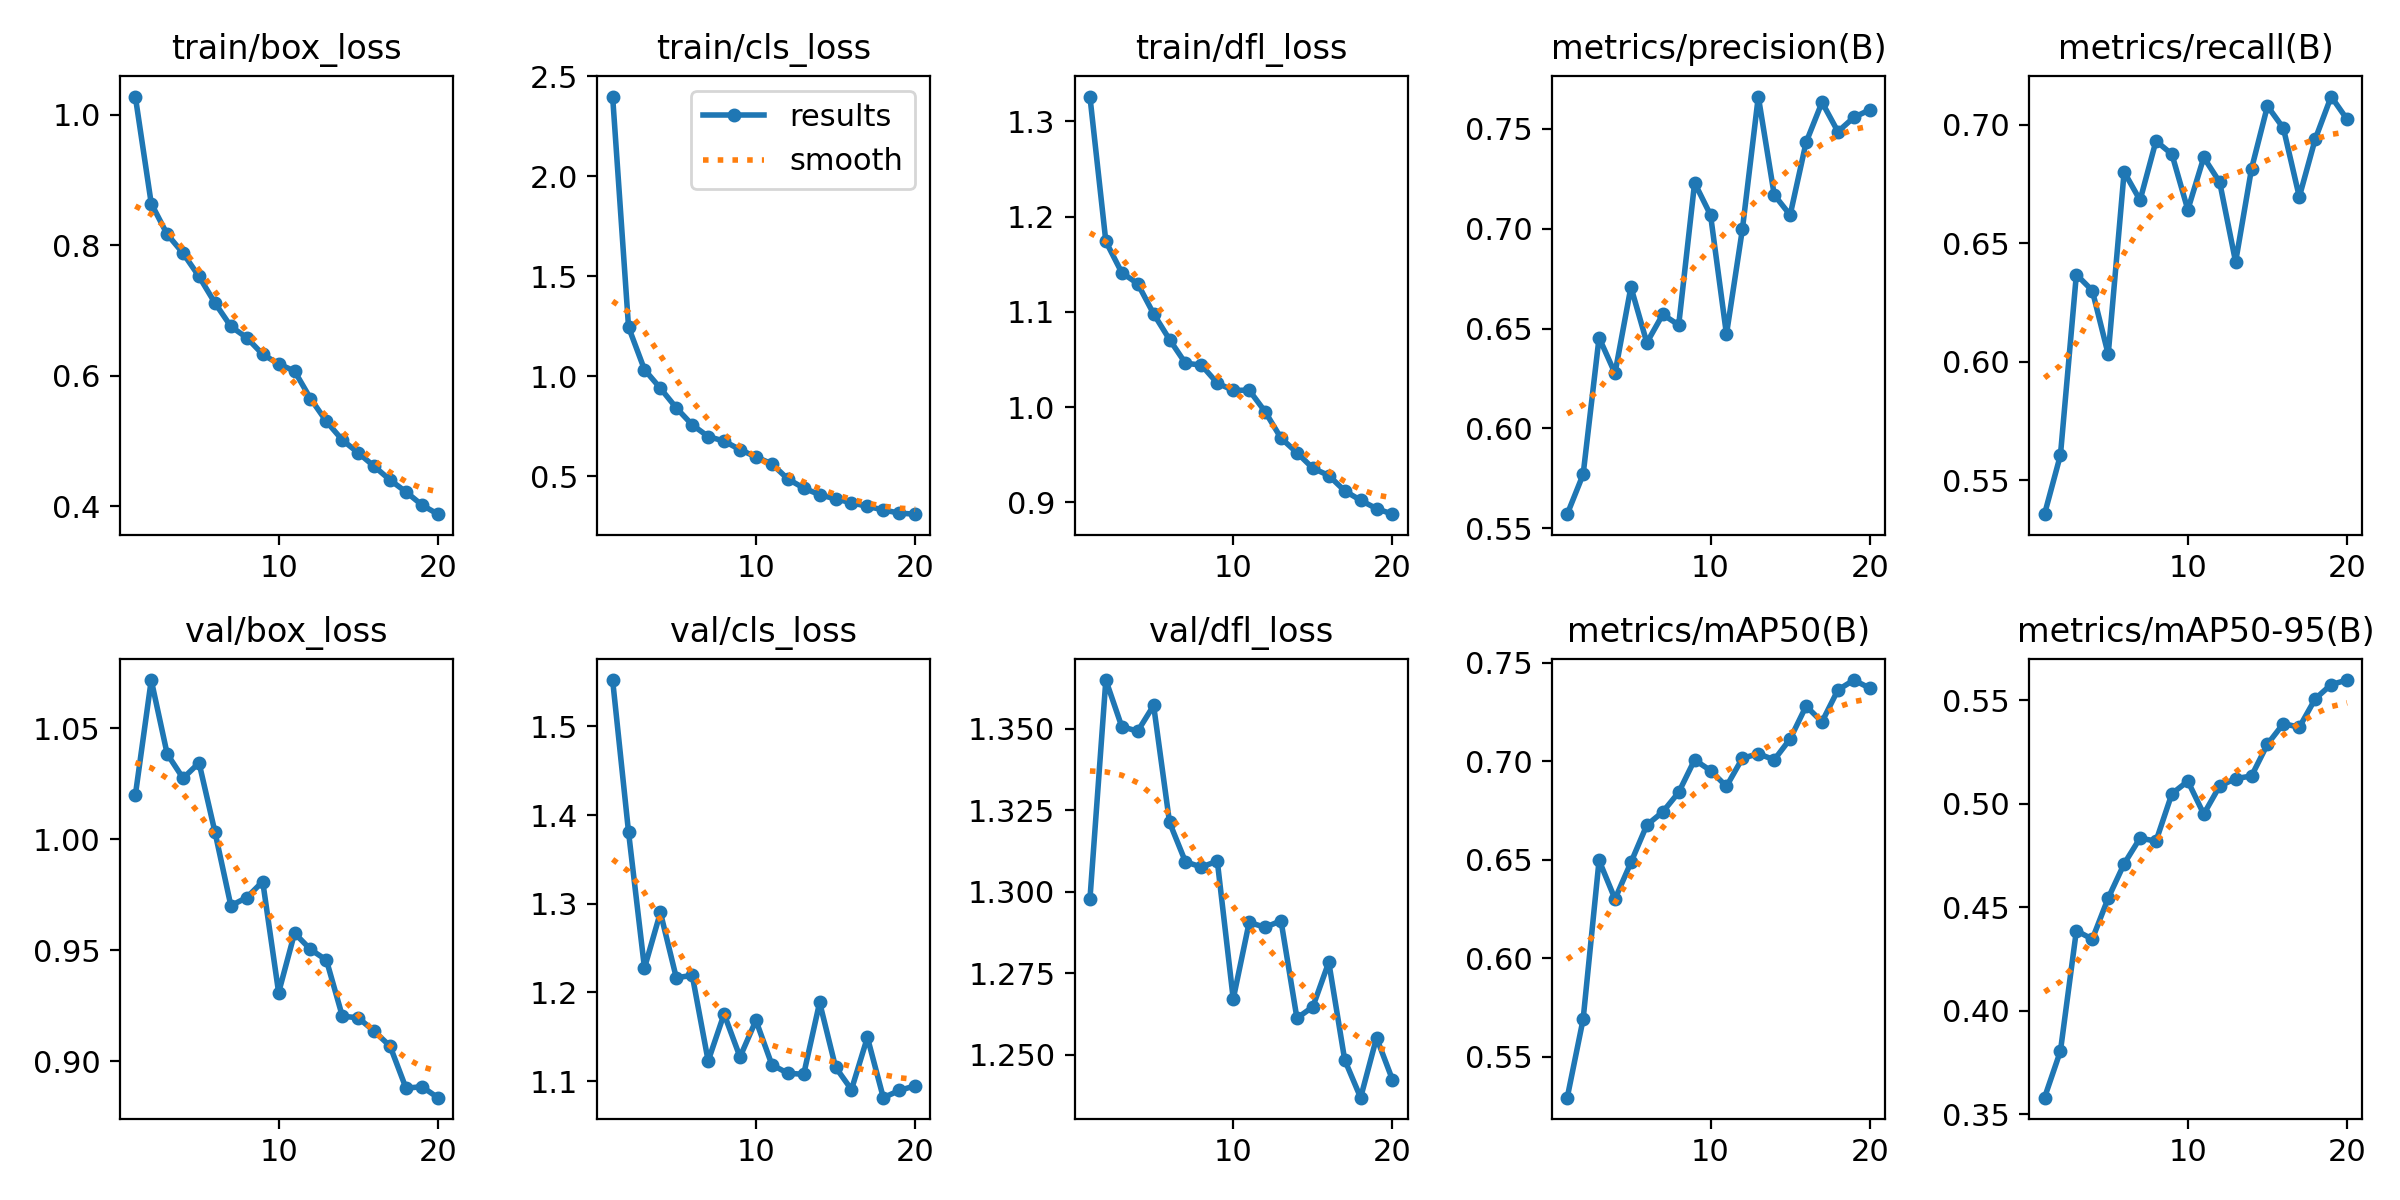

In [9]:
Image(filename='runs/detect/train2/results.png', width=600)

In [11]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.30it/s]
                   all        160       1055      0.759      0.702      0.737       0.56
                  boot         35         39      0.593      0.564      0.608       0.48
                   car        142        145      0.931      0.979      0.954      0.876
                  door         50         52      0.844      0.808      0.886      0.651
          front_bumper         30         30       0.62      0.567      0.624      0.485
           front_grill         49         51      0.674      0.627      0.578       0.48
      front_windshield         54         56      0.8

In [13]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source='/content/car/test/images'

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/22 /content/car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 front_grill, 1 license_plate, 16.4ms
image 2/22 /content/car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 3/22 /content/car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 3 cars, 2 license_plates, 16.3ms
image 4/22 /content/car/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 1 front_grill, 2 headlamps, 1 license_plate, 16.3ms
image 5/22 /content/car/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 640x640 1 car, 2 front_grills, 1 front_windshield, 2 headlamps, 1 license_plate, 2 sideview_mirrors, 16.4ms
image 6/22 /content/car/test/images/Cars343_png.rf.1faf32b05c2b6bb56b93e41b49b56db9.jpg

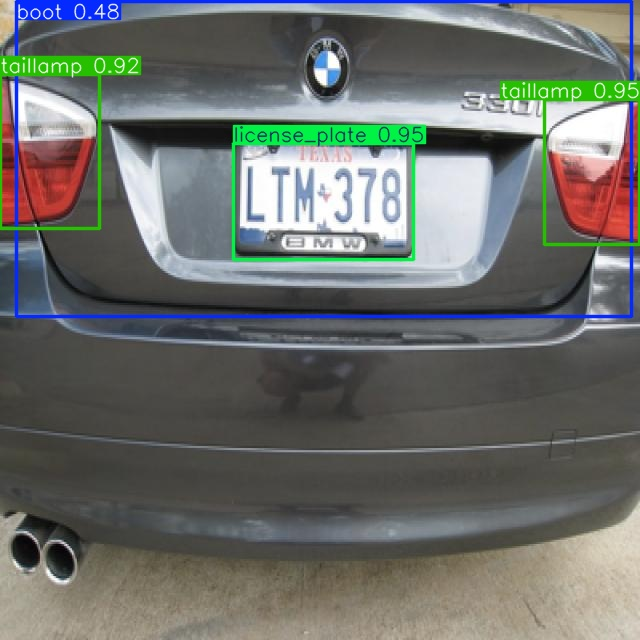

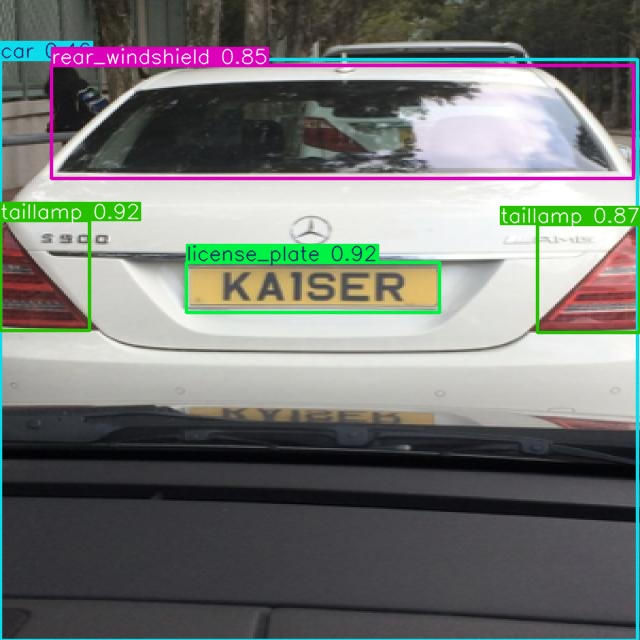

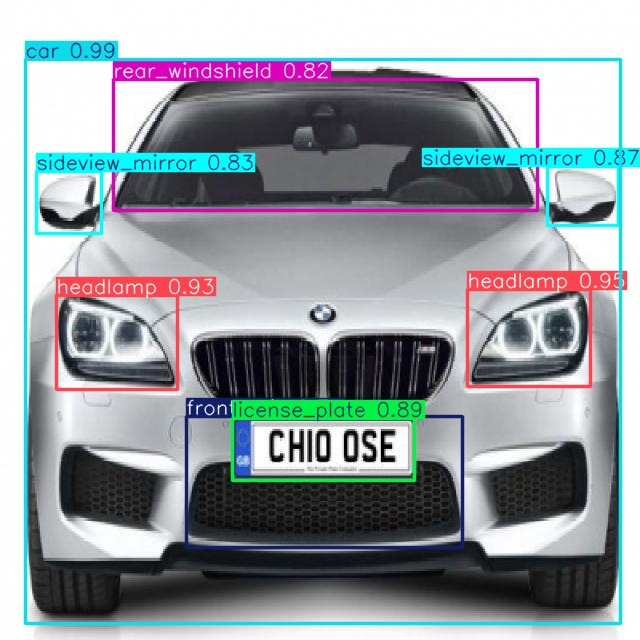

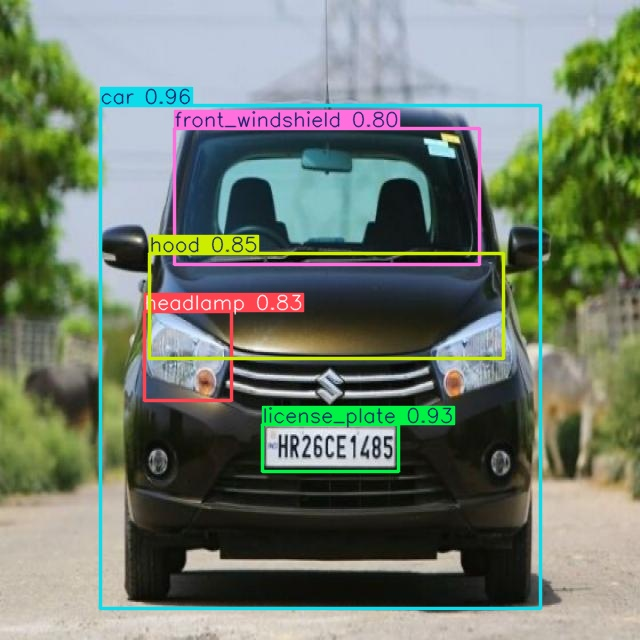

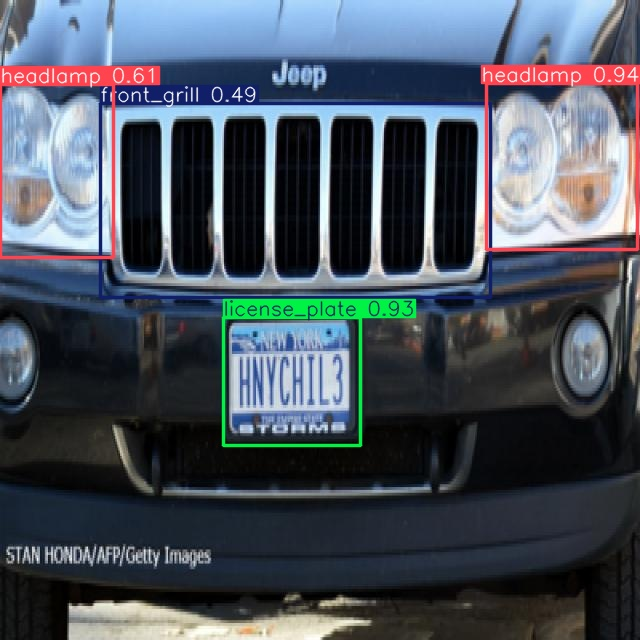

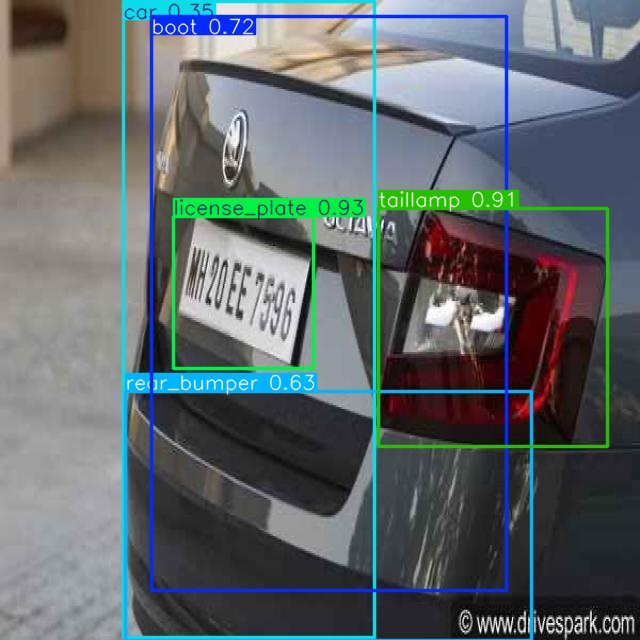

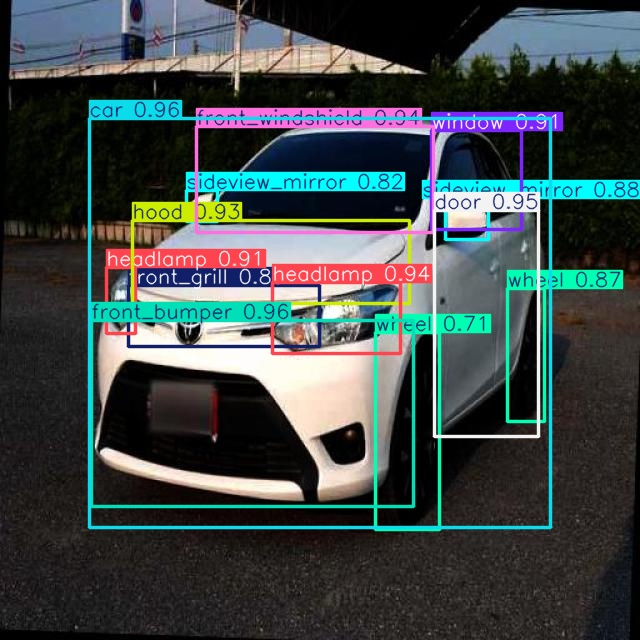

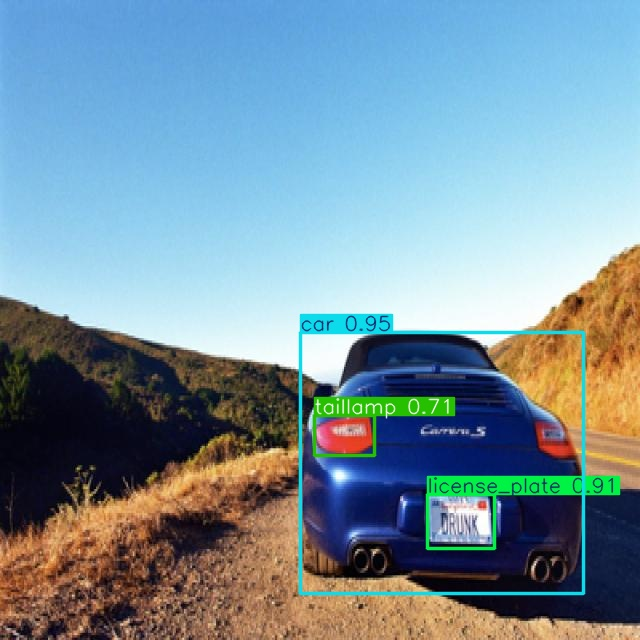

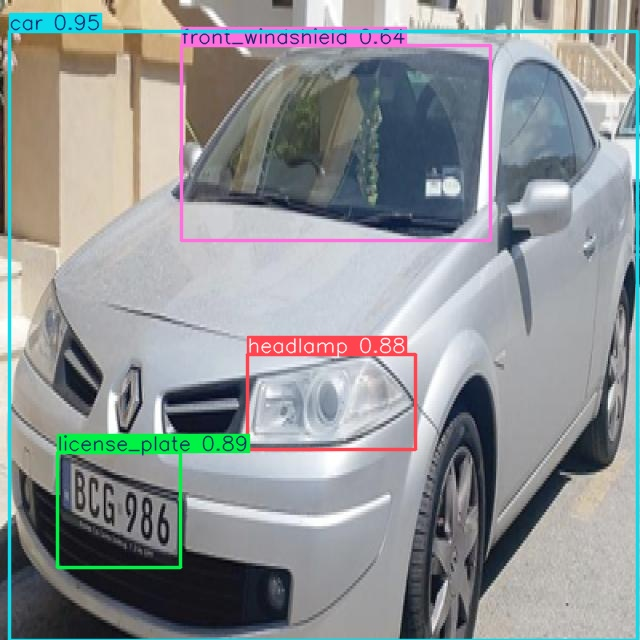

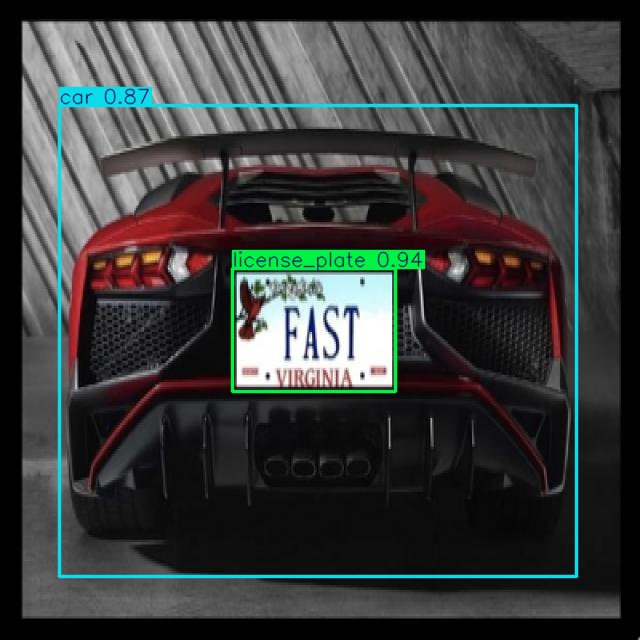

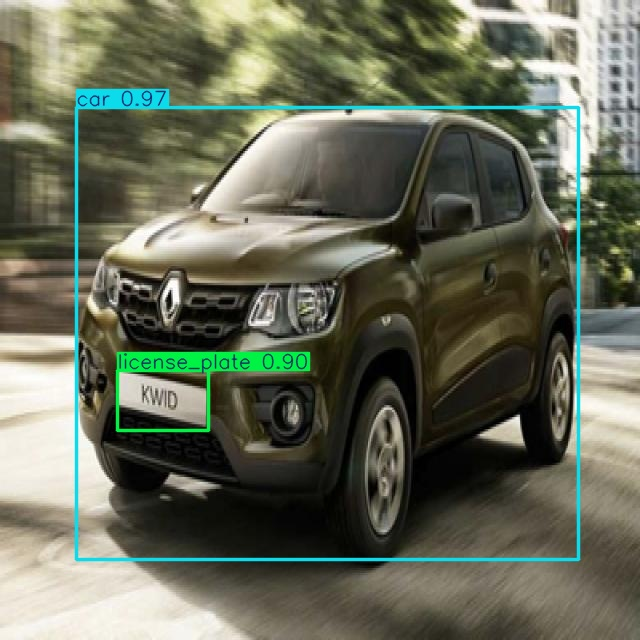

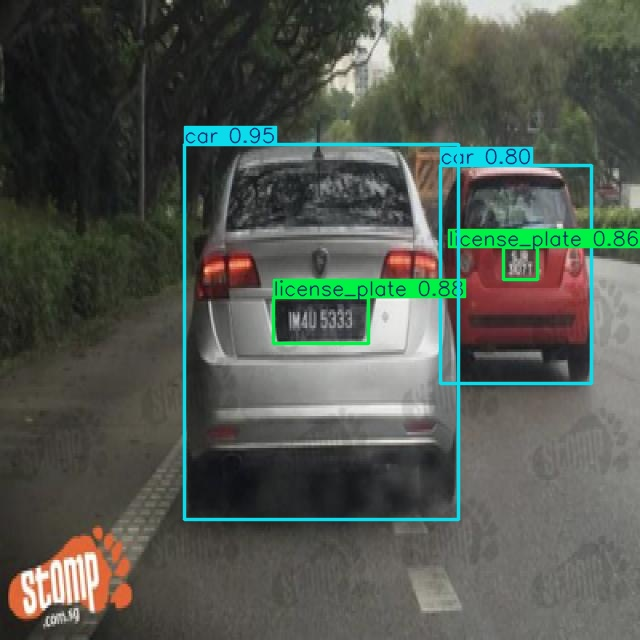

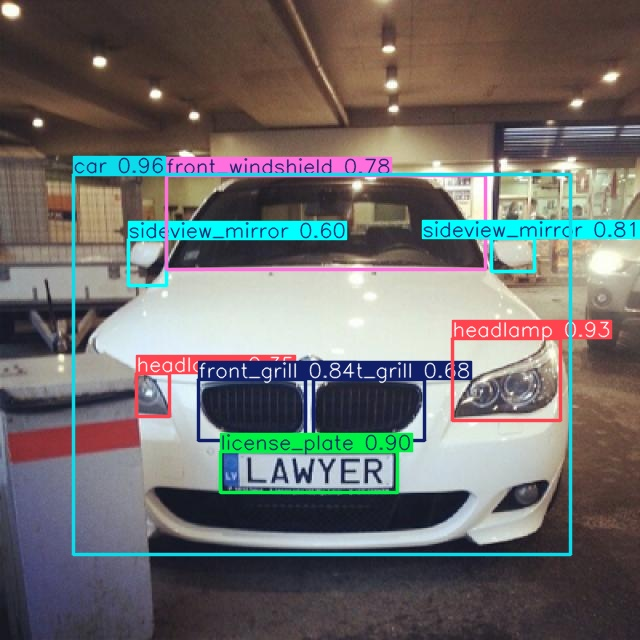

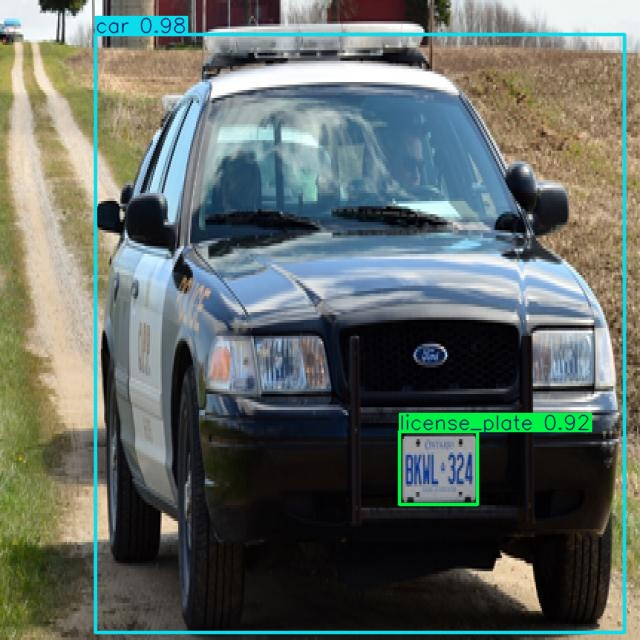

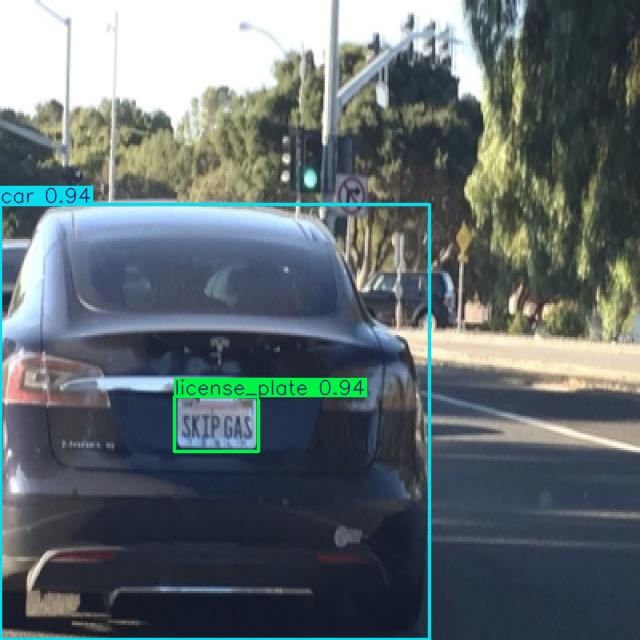

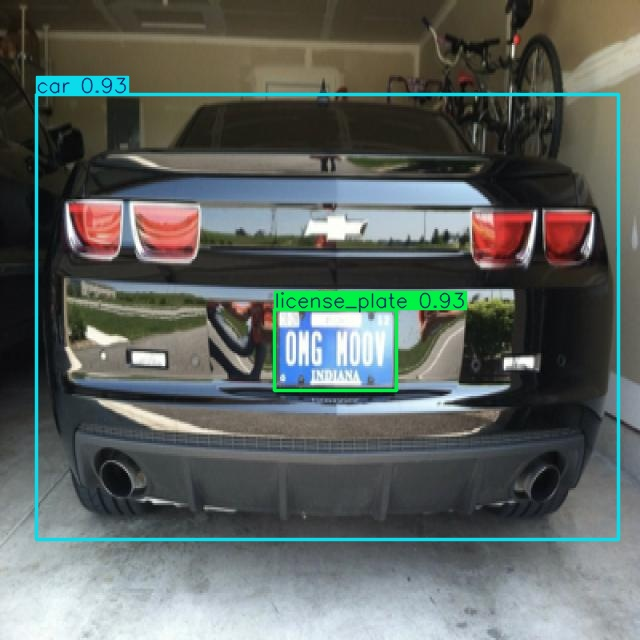

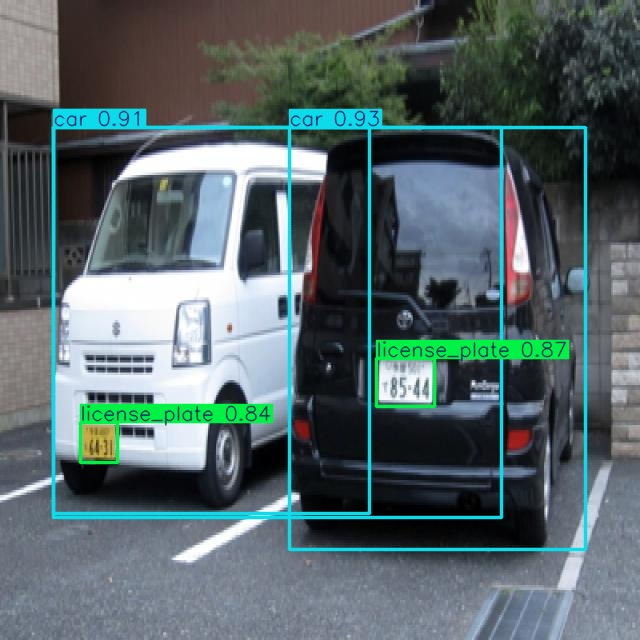

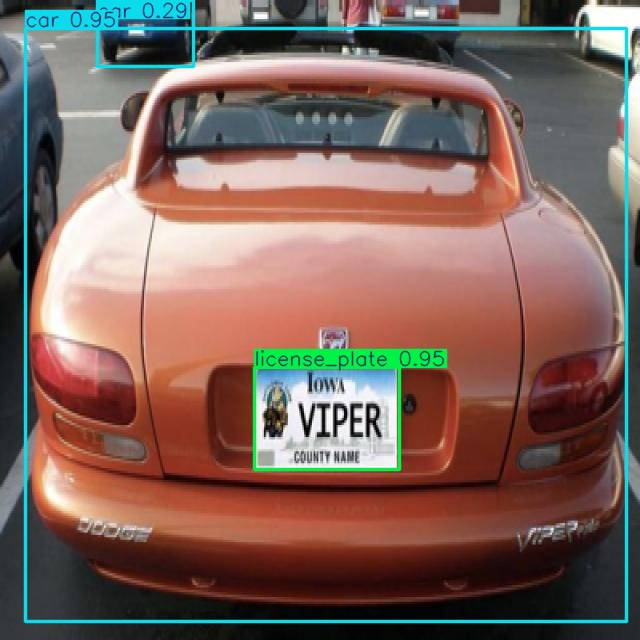

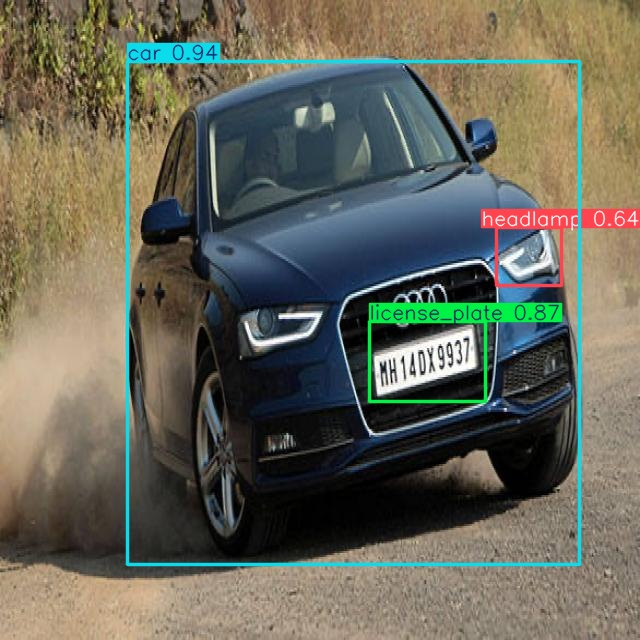

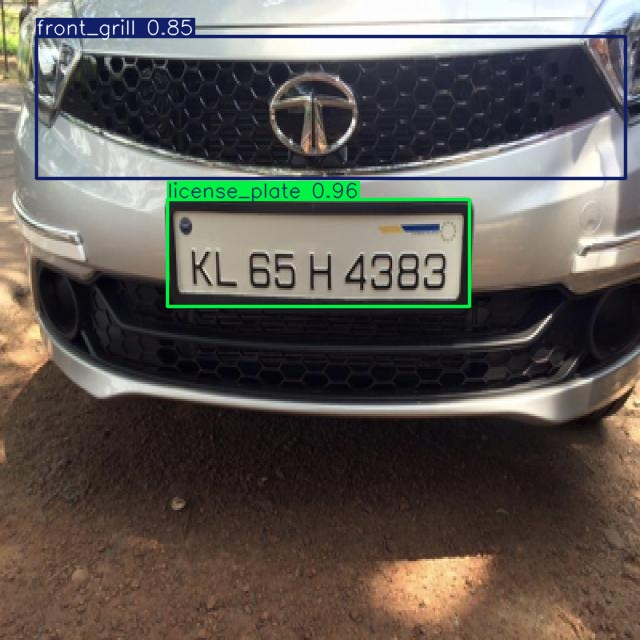

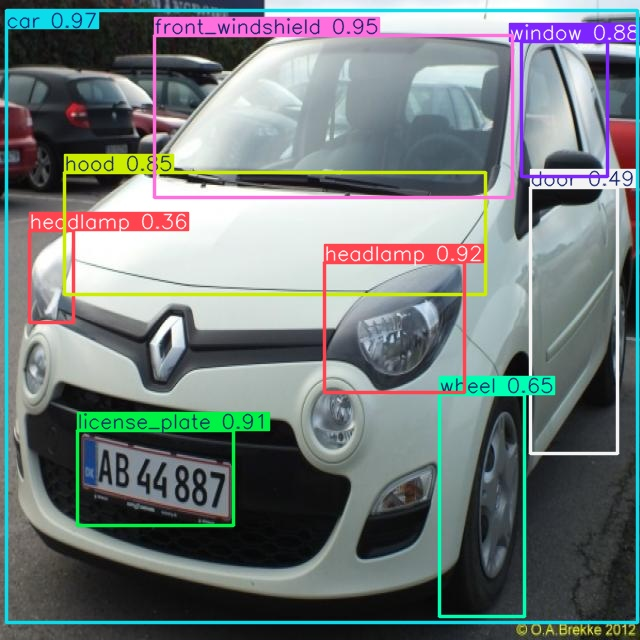

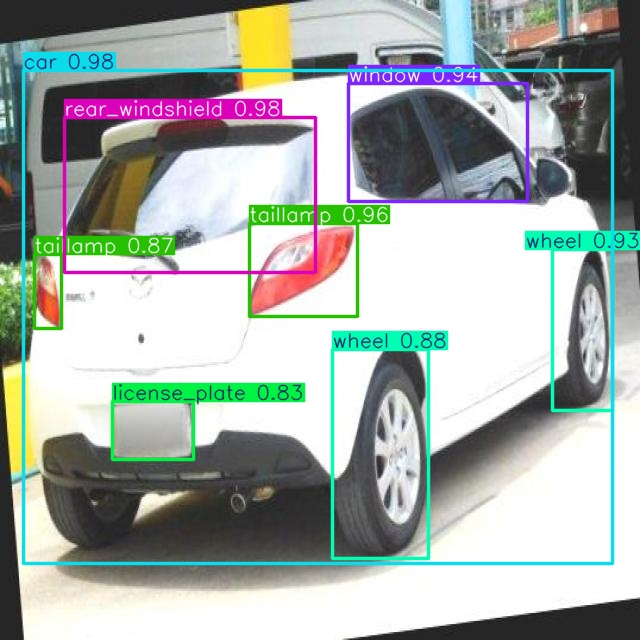

In [14]:
import glob

for image_path in glob.glob('runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")